In [78]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu)

In [79]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [80]:
data_set = tfds.load('fashion_mnist', split='train')

In [81]:
import numpy as np

data_itr = data_set.as_numpy_iterator()

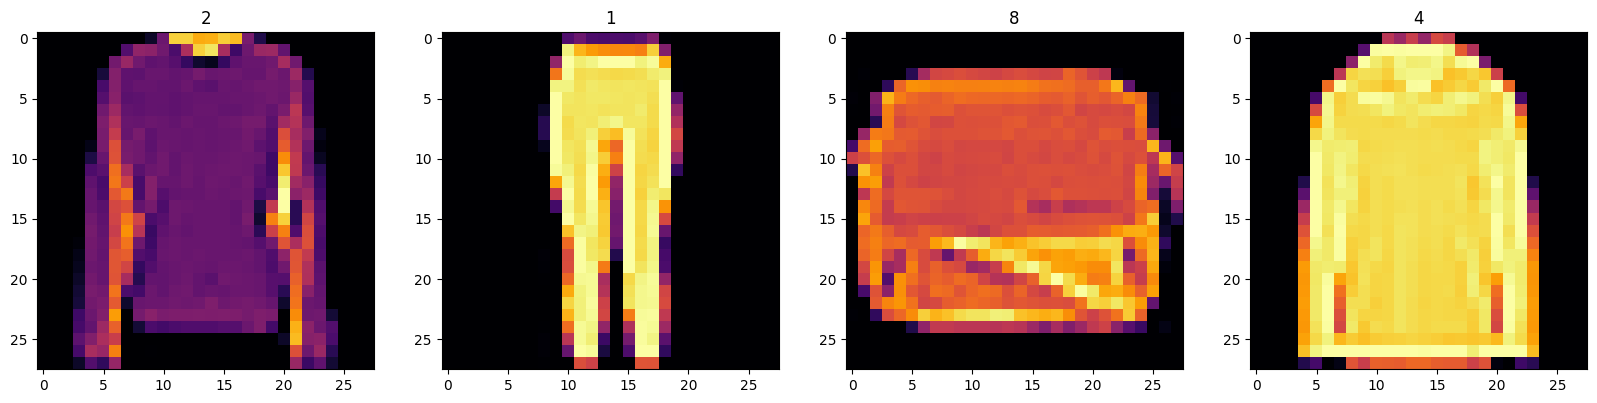

In [82]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
# print(fig, ax)
for i in range(4):
    sample = data_itr.next()
    ax[i].imshow(sample['image'], cmap='inferno')
    ax[i].title.set_text(sample['label'])


In [83]:
def normalize_image(data):
    img = data['image']
    return img / 255

In [84]:
data_set = data_set.map(normalize_image)
data_set = data_set.cache()
data_set = data_set.shuffle(60000)
data_set = data_set.batch(1)
data_set = data_set.prefetch(64)

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [112]:
def build_generator():

    model = Sequential()
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128, (5, 5), padding='same'))
    model.add(LeakyReLU(0.2))


    model.add(UpSampling2D())
    model.add(Conv2D(128, (5, 5), padding='same'))
    model.add(LeakyReLU(0.2))


    model.add(Conv2D(128, (4, 4), padding='same'))
    model.add(LeakyReLU(0.2))


    model.add(Conv2D(128, (4, 4), padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1, (4, 4), padding='same', activation='sigmoid'))


    return model

In [113]:
test_model = build_generator()
test_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [127]:
def reverse(img):
    return img * 255

1/1 [==============================] - 0s 36ms/step
[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]]


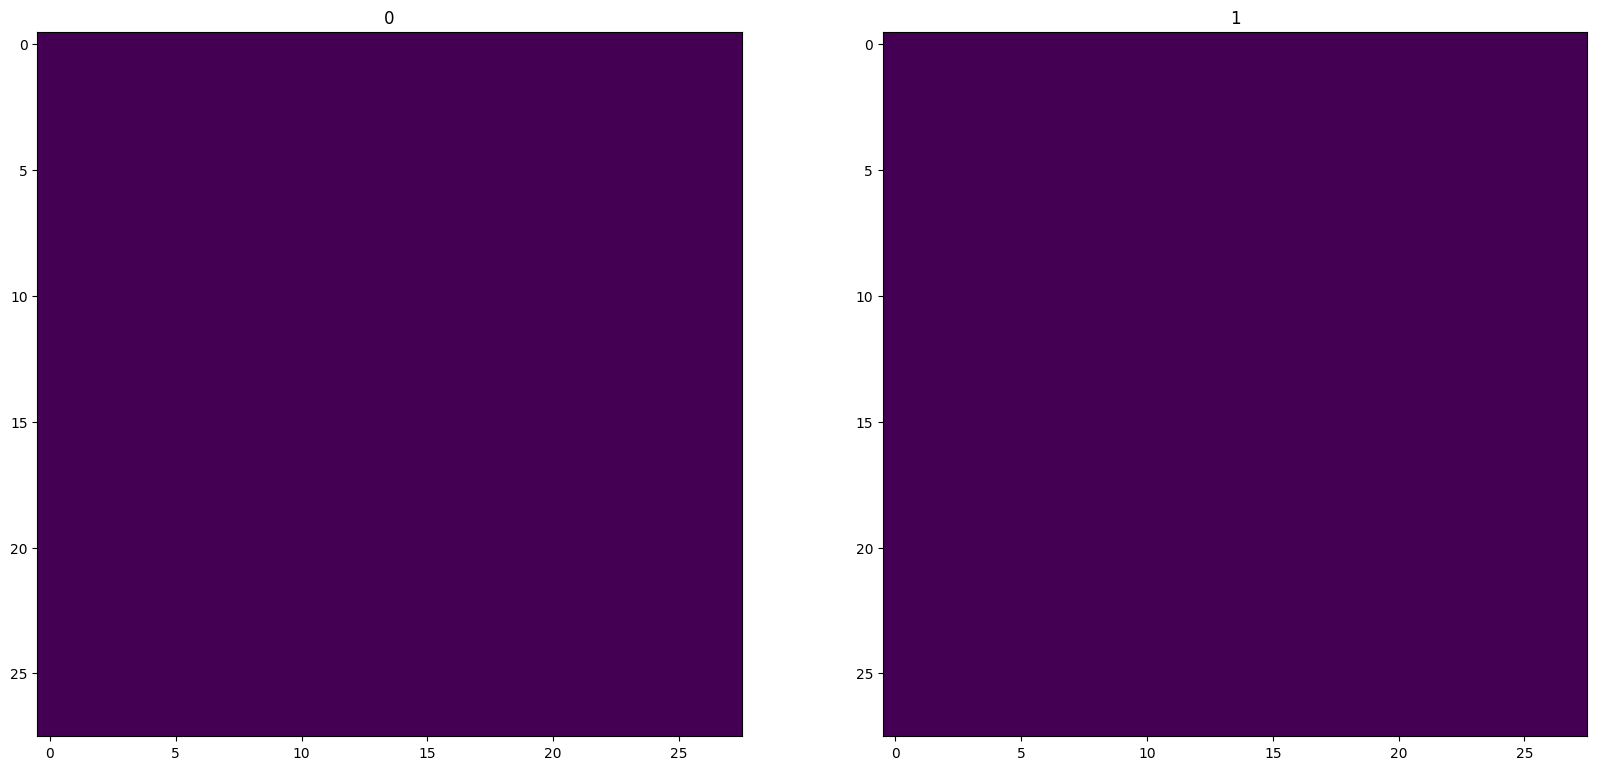

In [134]:

# print(r)
img = test_model.predict(np.random.randn(2, 128, 1))

fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
# print(fig, ax)
print(img)
for i, j in enumerate(img):
    ax[i].imshow(np.squeeze(reverse(j)))
    ax[i].title.set_text(i)
